In [1]:
import os
import sys

# Add the parent directory to the path to import the module evomol
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from evomol.representation import Molecule
from evomol.visualization.draw_mol import (
    draw_in_matplotlib,
    draw_multiple_svgs_in_matplotlib,
    mol_to_svg,
    draw_in_jupyter,
)
from evomol.search.enumeration import dict_of_neighbors
from evomol import default_parameters as dp


dp.setup_default_parameters(
    accepted_atoms=["C", "O", "N", "F", "S"],
    max_heavy_atoms=10,
)
dp.setup_default_action_space(
    with_add_group=False,
    with_remove_group=False,
)

In [2]:
smiles = "C1=CSC(=C2SC=CS2)S1"  # TTF

molecule = Molecule(smiles)
neighbors = dict_of_neighbors(molecule)

MolecularGraph
ChangeBondMG


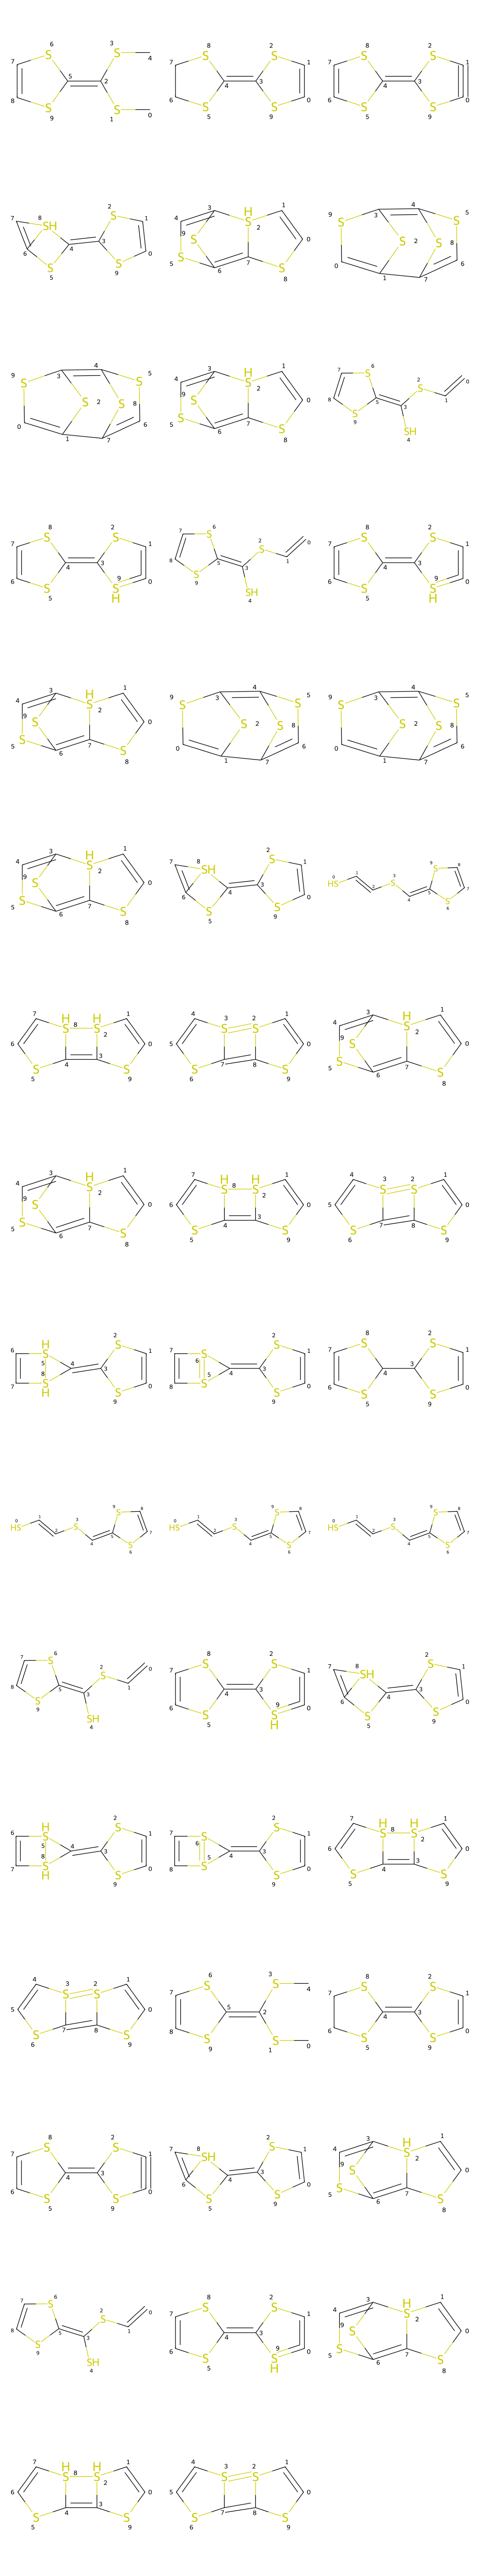

CutAtomMG


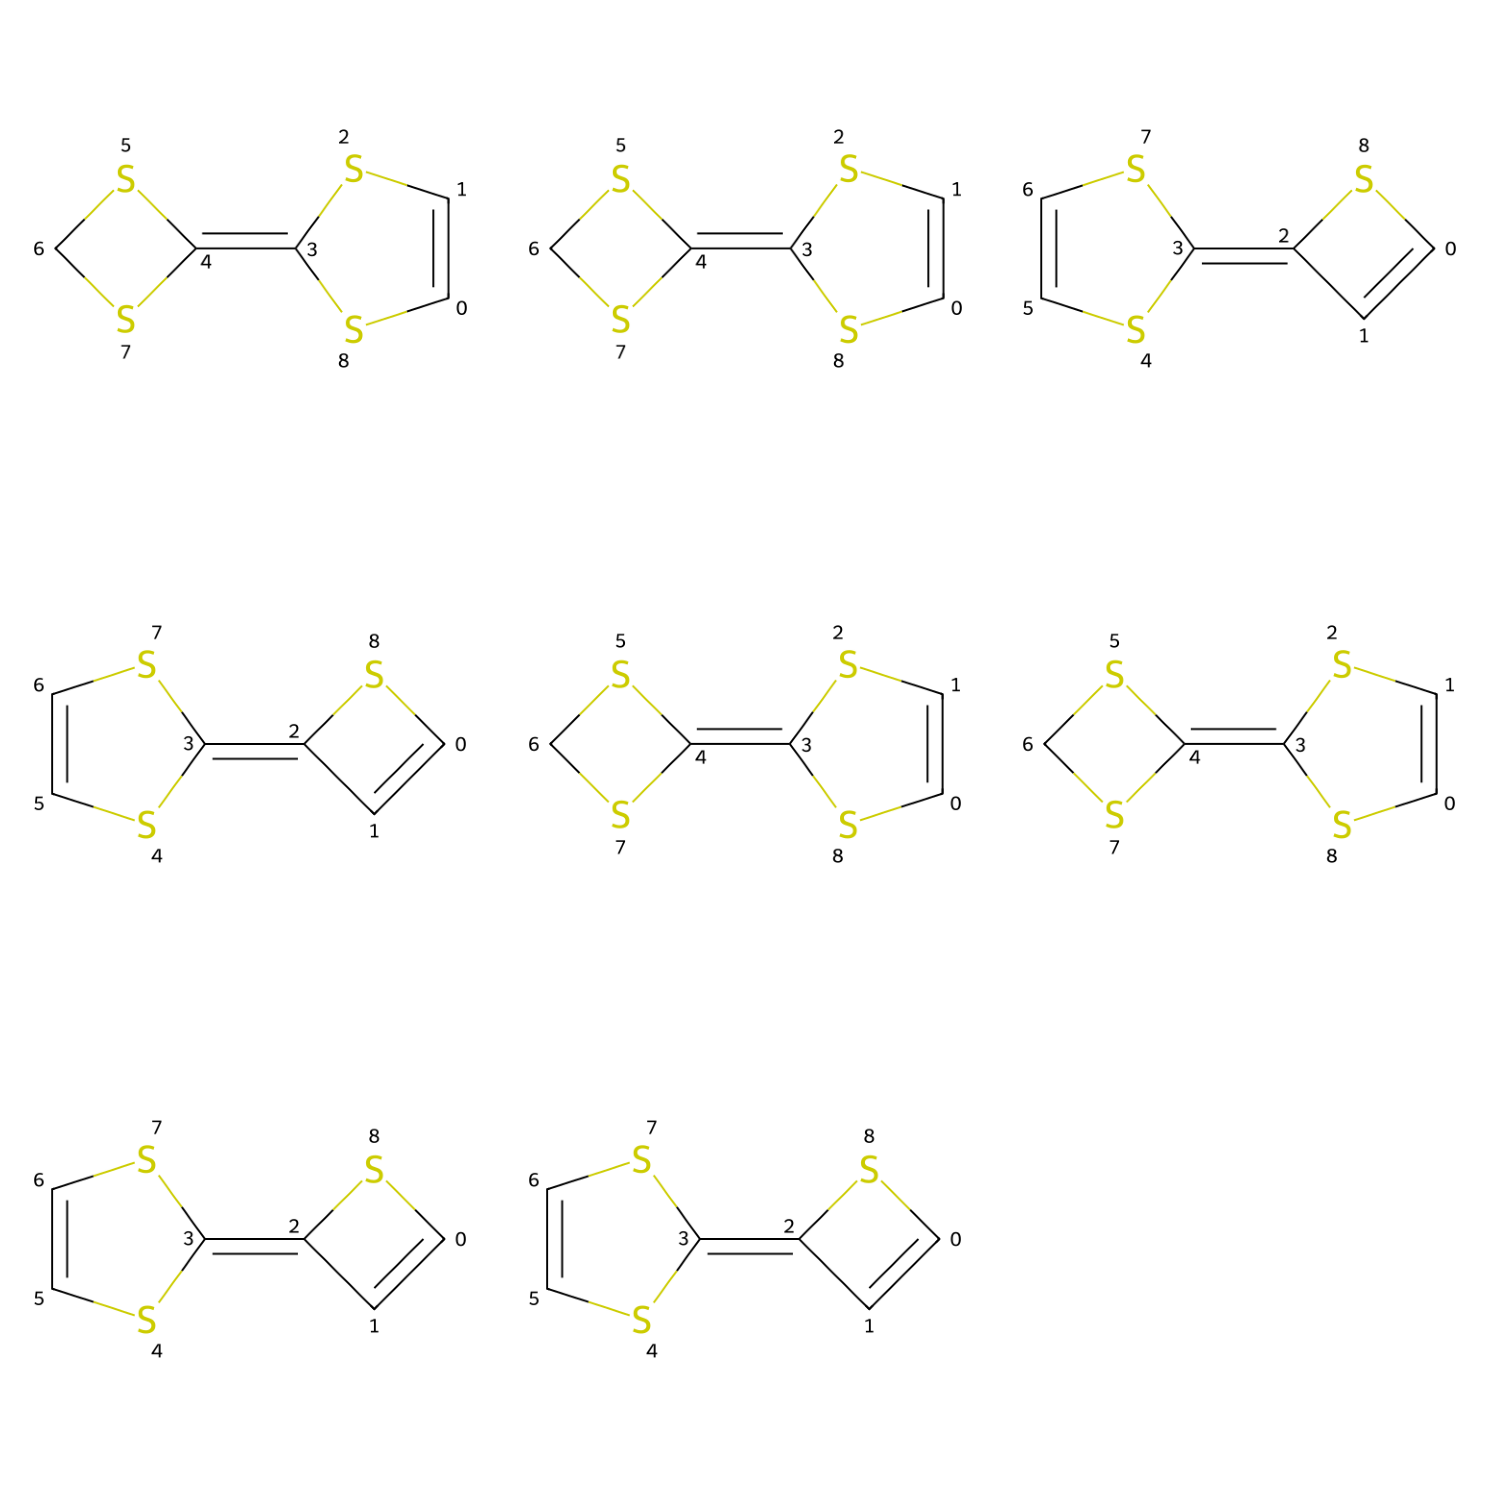

MoveGroupMG


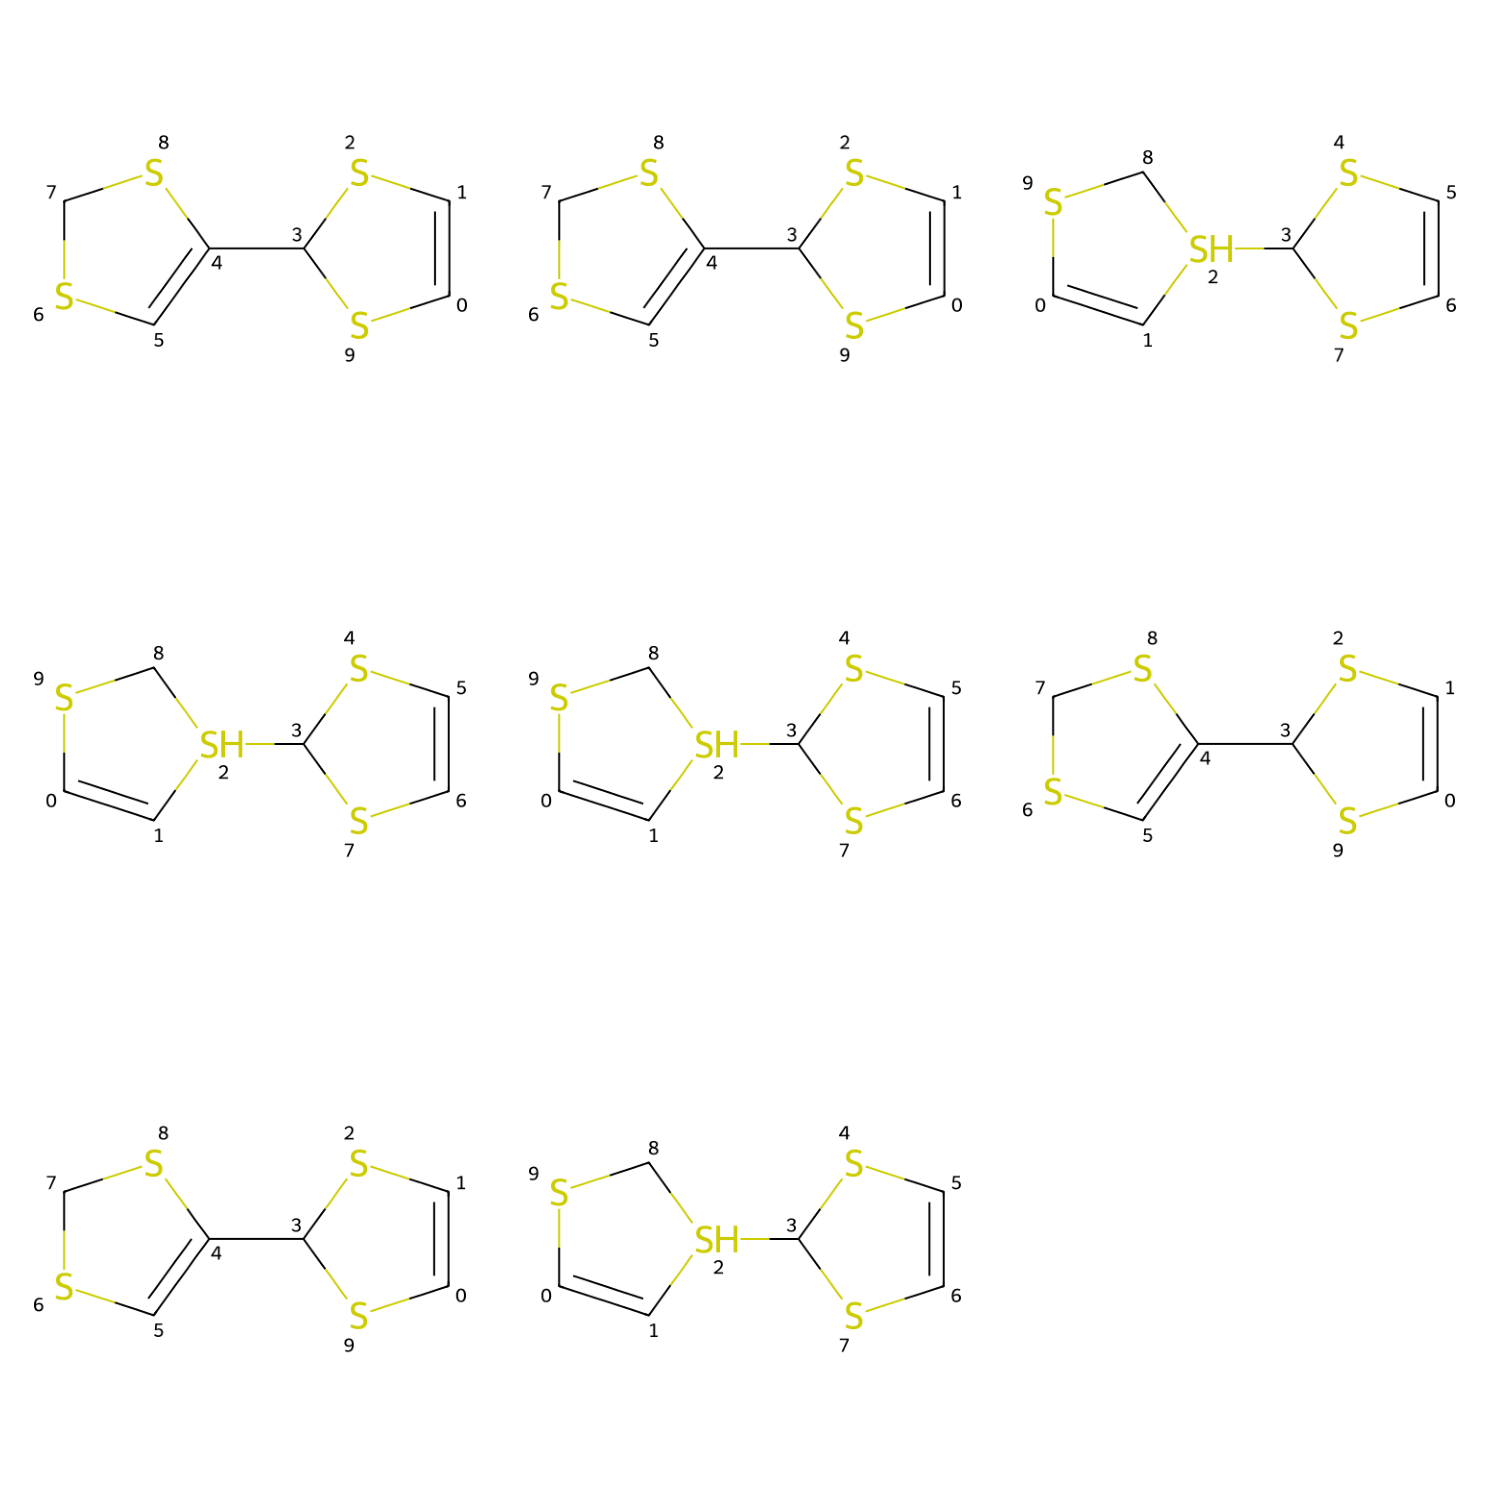

RemoveAtomMG


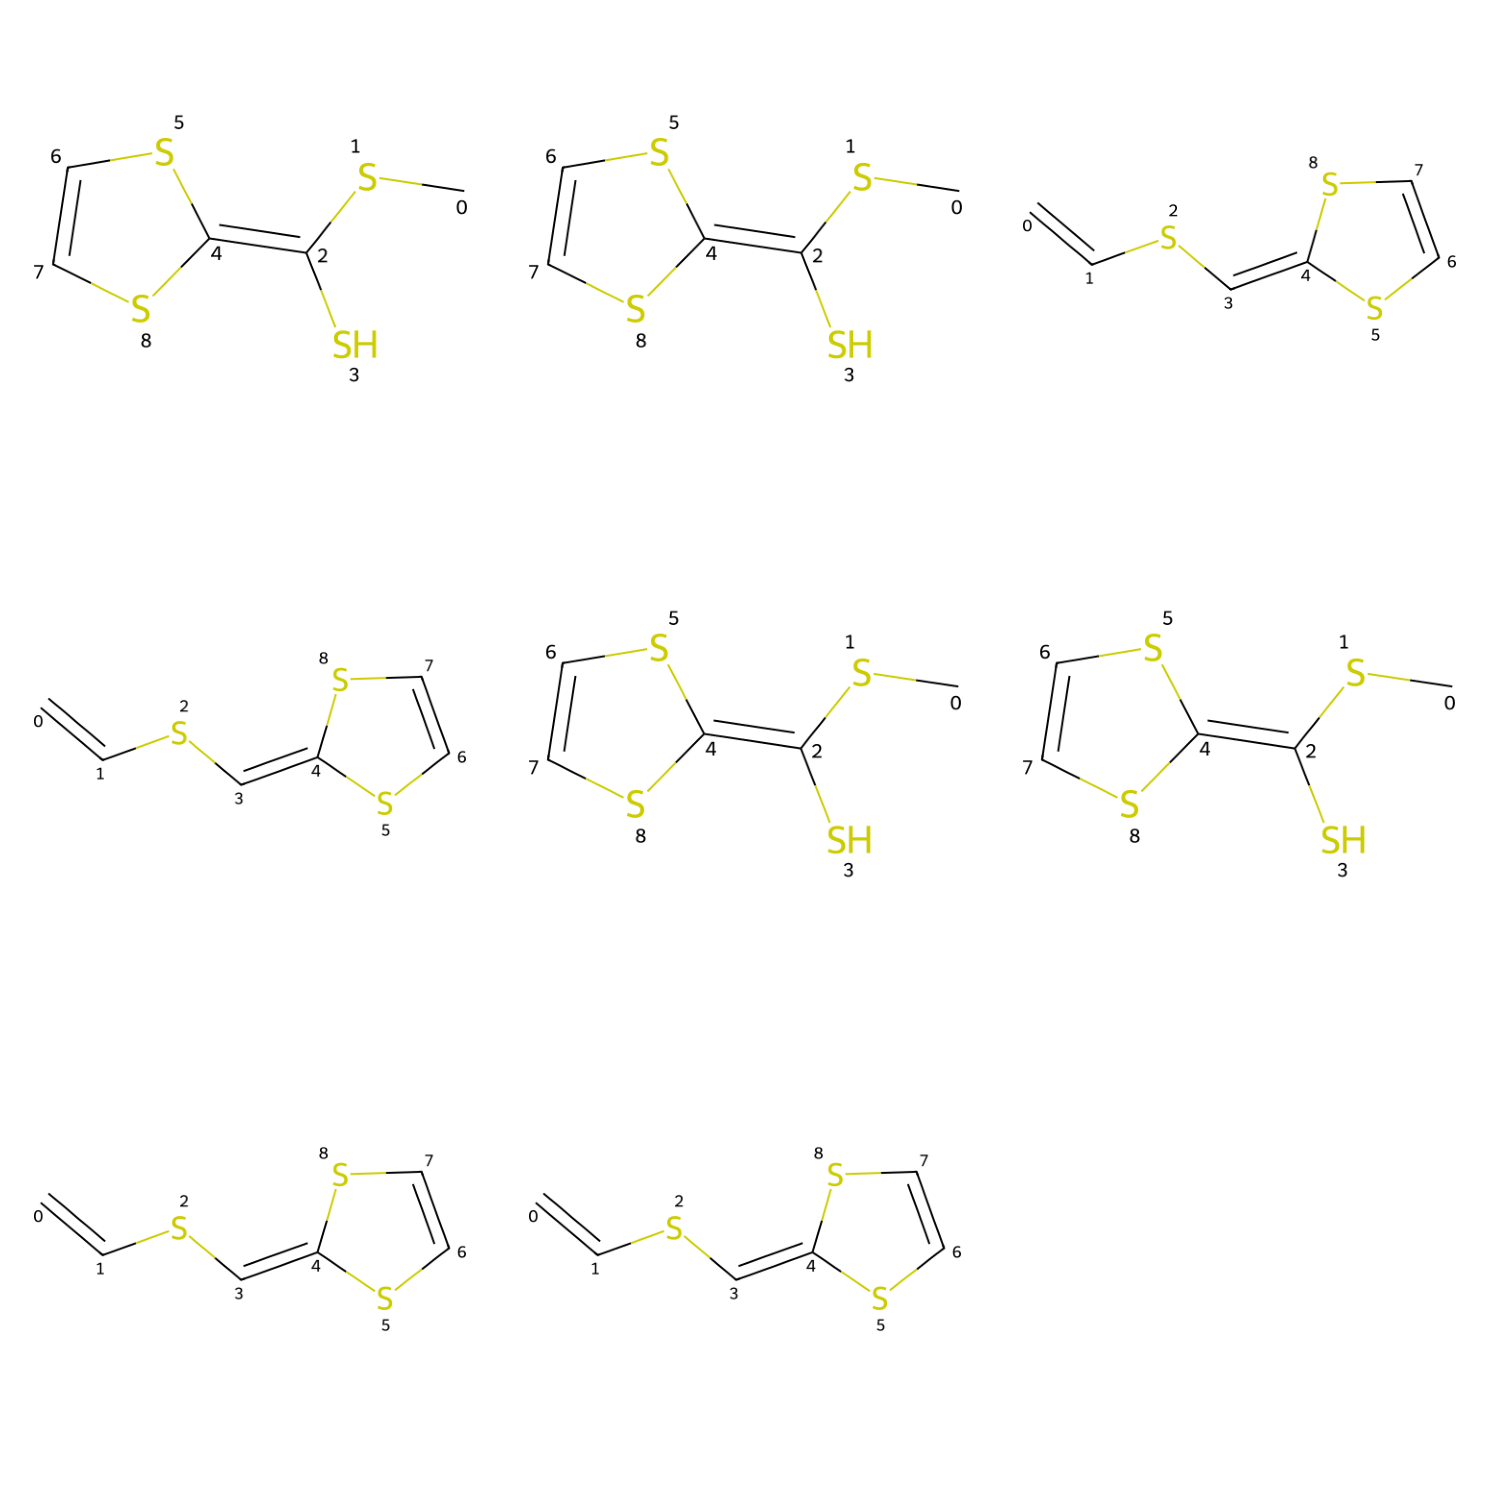

SubstituteAtomMG


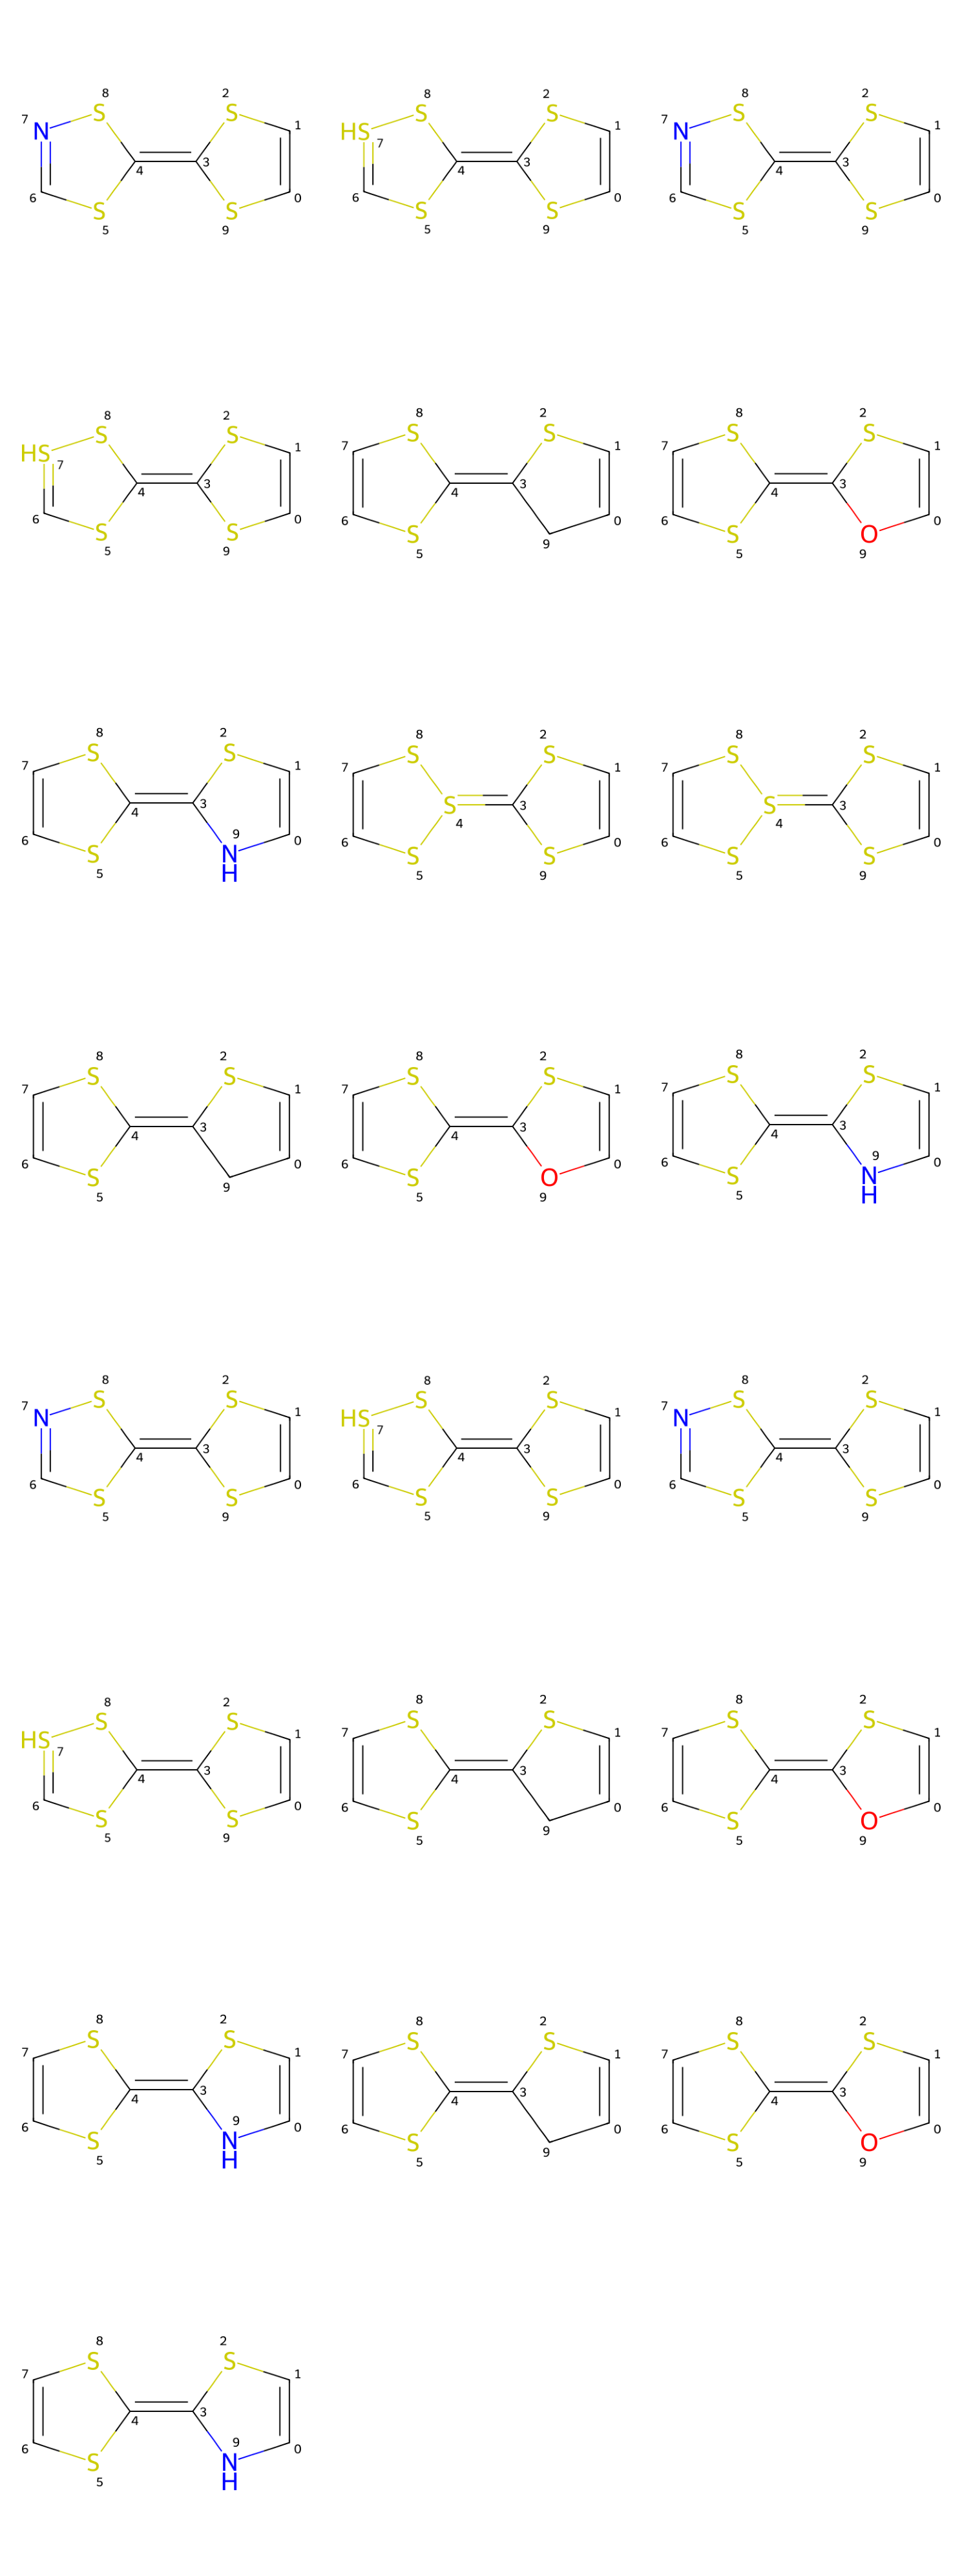

In [3]:
for representation, action_dict in neighbors.items():
    print(representation)
    for action, neighbors_ in action_dict.items():
        print(action)
        draw_multiple_svgs_in_matplotlib(
            [mol_to_svg(neighbor) for neighbor in neighbors_]
        )